In [202]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [203]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [204]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [205]:
def file_get_contents(filename):
    with open(filename) as f:
        return f.read()

In [206]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import json
import re

#file_json_contents = file_get_contents("./files_parseds/ALEXIS PEDRÃO_260001087378.json")
#file_json_contents = file_get_contents("./files_parseds/EDVALDO_260000983413.json")
#file_json_contents = file_get_contents("./files_parseds/DELEGADA DANIELLE_260000637328.json")
file_json_contents = file_get_contents("./files_parseds/MÁRCIO MACEDO_260000958767.json")

json_data = json.loads(file_json_contents)
content_pages = [re.sub(r'[0-9]', '', content["text"]) for content in json_data["content"]]

In [207]:
stop_words = ["de","a","o","que","e","do","da","em","um","para","é", "etc","com","não","uma","os","no","se","na","por","mais","as","dos","como","mas","foi","ao","ele","das","tem","à","seu","sua","ou","ser","quando","muito","há","nos","já","está","eu","também","só","pelo","pela","até","isso","ela","entre","era","depois","sem","mesmo","aos","ter","seus","quem","nas","me","esse","eles","estão","você","tinha","foram","essa","num","nem","suas","meu","às","minha","têm","numa","pelos","elas","havia","seja","qual","será","nós","tenho","lhe","deles","essas","esses","pelas","este","fosse","dele","tu","te","vocês","vos","lhes","meus","minhas","teu","tua","teus","tuas","nosso","nossa","nossos","nossas","dela","delas","esta","estes","estas","aquele","aquela","aqueles","aquelas","isto","aquilo","estou","está","estamos","estão","estive","esteve","estivemos","estiveram","estava","estávamos","estavam","estivera","estivéramos","esteja","estejamos","estejam","estivesse","estivéssemos","estivessem","estiver","estivermos","estiverem","hei","há","havemos","hão","houve","houvemos","houveram","houvera","houvéramos","haja","hajamos","hajam","houvesse","houvéssemos","houvessem","houver","houvermos","houverem","houverei","houverá","houveremos","houverão","houveria","houveríamos","houveriam","sou","somos","são","era","éramos","eram","fui","foi","fomos","foram","fora","fôramos","seja","sejamos","sejam","fosse","fôssemos","fossem","for","formos","forem","serei","será","seremos","serão","seria","seríamos","seriam","tenho","tem","temos","tém","tinha","tínhamos","tinham","tive","teve","tivemos","tiveram","tivera","tivéramos","tenha","tenhamos","tenham","tivesse","tivéssemos","tivessem","tiver","tivermos","tiverem","terei","terá","teremos","terão","teria","teríamos","teriam"]
tfIdfVectorizer=TfidfVectorizer(
    max_df=0.8,
    min_df=0.2,
    stop_words=stop_words,
    use_idf=True,
    ngram_range=(1,2),
    max_features=100
)
tfIdf = tfIdfVectorizer.fit_transform(content_pages)
df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
df_word = df.head(50)

sentences_dictionary = {}
text_database = []

for sentence, row in df_word.iterrows():
    if sentence not in stop_words:
        text_instance = {}
        text_instance['sentence'] = sentence
        text_instance['tf-idf'] = row["TF-IDF"]
        sentences_dictionary[sentence] = row["TF-IDF"]
        text_database.append(text_instance)

#print(sentences_dictionary)
print(text_database)

[{'sentence': 'cidade', 'tf-idf': 0.6943893991735253}, {'sentence': 'aracaju', 'tf-idf': 0.44067758184591904}, {'sentence': 'planejamento', 'tf-idf': 0.29579731411439375}, {'sentence': 'serviços', 'tf-idf': 0.18886182079110816}, {'sentence': 'urbana', 'tf-idf': 0.1842282101022962}, {'sentence': 'infraestrutura', 'tf-idf': 0.1842282101022962}, {'sentence': 'população', 'tf-idf': 0.1842282101022962}, {'sentence': 'propostas', 'tf-idf': 0.10476267400369492}, {'sentence': 'urbanos', 'tf-idf': 0.09859910470479792}, {'sentence': 'valorização', 'tf-idf': 0.09859910470479792}, {'sentence': 'ambiental', 'tf-idf': 0.09859910470479792}, {'sentence': 'todos', 'tf-idf': 0.0921141050511481}, {'sentence': 'partir', 'tf-idf': 0.0921141050511481}, {'sentence': 'públicas', 'tf-idf': 0.08649654283285757}, {'sentence': 'públicos', 'tf-idf': 0.08154150178929286}, {'sentence': 'gestão', 'tf-idf': 0.07710906653623373}, {'sentence': 'rede', 'tf-idf': 0.07710906653623373}, {'sentence': 'políticas', 'tf-idf': 0

/home/nathanfeitoza/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [208]:
tfIdf.shape

(22, 86)

In [209]:
dataframe_texts =  pd.DataFrame(text_database)
dataframe_texts

,sentence,tf-idf
0,cidade,0.694389
1,aracaju,0.440678
2,planejamento,0.295797
3,serviços,0.188862
4,urbana,0.184228
5,infraestrutura,0.184228
6,população,0.184228
7,propostas,0.104763
8,urbanos,0.098599
9,valorização,0.098599


In [210]:
# Imports necessários
from sklearn.cluster import KMeans
from sklearn import metrics

# Variando o número de k de 1 a 10 para analisar os valores da métrica

for k in range(2, 10):
  km = KMeans(n_clusters=k,random_state=42)
  km.fit(tfIdf)
  score = metrics.silhouette_score(tfIdf, km.labels_, metric='euclidean')
  print("Para k=%i o valor Silhoutte foi de %.4f" % (k, score))

Para k=2 o valor Silhoutte foi de 0.0648
Para k=3 o valor Silhoutte foi de 0.0566
Para k=4 o valor Silhoutte foi de 0.0488
Para k=5 o valor Silhoutte foi de 0.0611
Para k=6 o valor Silhoutte foi de 0.0805
Para k=7 o valor Silhoutte foi de 0.0705
Para k=8 o valor Silhoutte foi de 0.0854
Para k=9 o valor Silhoutte foi de 0.0927


In [211]:
km = KMeans(n_clusters=5,random_state=42)
clusters_km = km.fit_predict(tfIdf)
clusters_km

array([2, 2, 2, 0, 2, 2, 0, 0, 3, 3, 3, 0, 1, 1, 1, 4, 3, 1, 1, 4, 4, 4],
      dtype=int32)

In [212]:
dataframe_texts['clusters_km'] = pd.Series(clusters_km)
dataframe_texts

,sentence,tf-idf,clusters_km
0,cidade,0.694389,2.0
1,aracaju,0.440678,2.0
2,planejamento,0.295797,2.0
3,serviços,0.188862,0.0
4,urbana,0.184228,2.0
5,infraestrutura,0.184228,2.0
6,população,0.184228,0.0
7,propostas,0.104763,0.0
8,urbanos,0.098599,3.0
9,valorização,0.098599,3.0


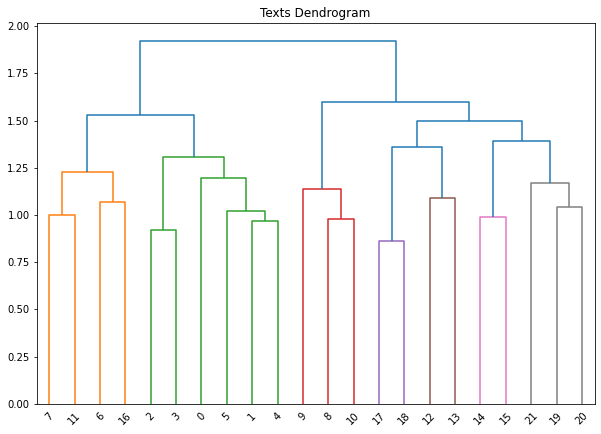

In [213]:
# Imports necessários
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# Criando e plotando o dendrograma
plt.figure(figsize=(10, 7))
plt.title("Texts Dendrogram")
cluster_alg = shc.linkage(tfIdf.toarray(), method='ward',)
dend = shc.dendrogram(cluster_alg)

In [214]:
# Imports Necessários
from sklearn.cluster import AgglomerativeClustering

# Criação do Cluster
agg_cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
clusters_agg = agg_cluster.fit_predict(tfIdf.toarray())
clusters_agg

array([0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 1, 3, 3, 5, 5, 1, 6, 6, 4, 4, 4])

In [215]:
dataframe_texts['cluster_agg'] = pd.Series(clusters_agg)
dataframe_texts

,sentence,tf-idf,clusters_km,cluster_agg
0,cidade,0.694389,2.0,0.0
1,aracaju,0.440678,2.0,0.0
2,planejamento,0.295797,2.0,0.0
3,serviços,0.188862,0.0,0.0
4,urbana,0.184228,2.0,0.0
5,infraestrutura,0.184228,2.0,0.0
6,população,0.184228,0.0,1.0
7,propostas,0.104763,0.0,1.0
8,urbanos,0.098599,3.0,2.0
9,valorização,0.098599,3.0,2.0


In [216]:
## Limpar valores NaN para 0

dataframe_texts = dataframe_texts.fillna(0)
dataframe_texts

,sentence,tf-idf,clusters_km,cluster_agg
0,cidade,0.694389,2.0,0.0
1,aracaju,0.440678,2.0,0.0
2,planejamento,0.295797,2.0,0.0
3,serviços,0.188862,0.0,0.0
4,urbana,0.184228,2.0,0.0
5,infraestrutura,0.184228,2.0,0.0
6,população,0.184228,0.0,1.0
7,propostas,0.104763,0.0,1.0
8,urbanos,0.098599,3.0,2.0
9,valorização,0.098599,3.0,2.0


In [217]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
order_centroids

array([[43, 72, 81, 11, 22, 13, 20, 14, 51, 85, 17,  4, 42, 64, 27, 19,
        73,  5, 46, 33, 53, 10, 65, 47, 18, 59, 52, 23, 26, 58, 84, 21,
         8, 40, 57, 66, 61, 54, 62, 75, 39,  1, 76, 35, 30, 37, 36, 12,
        70, 63, 74, 45, 50, 34, 24, 80,  3, 15,  0, 28,  6, 44, 29, 71,
        83, 69,  2,  7, 68,  9, 67, 82, 38, 79, 16, 78, 41, 77, 56, 55,
        25, 49, 48, 31, 32, 60],
       [41, 59, 75, 29, 30, 40, 54, 21, 80, 43, 79, 47, 74, 71, 10, 60,
        55,  6, 56, 53, 73, 32, 24, 51,  0, 84, 65, 23, 31, 26,  5,  3,
        61, 46, 16,  1, 67,  8, 52, 36, 70, 69, 27, 57, 72, 33, 77, 76,
        35, 14, 28, 49, 37, 78, 58, 48, 13, 44, 66,  4, 20, 18, 39, 12,
        22, 15, 63, 42, 68, 62, 11, 85, 38, 45, 34, 50,  9, 19,  7, 64,
        25, 81, 82,  2, 83, 17],
       [11,  2, 82, 81, 85, 51,  5, 37,  3, 21, 35, 50, 64, 71, 22, 66,
        61, 39, 33, 25, 57, 59, 28, 40, 56,  8, 65, 62, 34, 75,  9, 19,
        10, 44, 15, 17, 42, 48, 63, 68, 31, 43, 45, 18,  1, 49, 38, 76

In [218]:
# Criação de uma veriável com a lista de palavras que representa as colunas da matriz.
terms = tfIdfVectorizer.get_feature_names_out()

In [219]:
terms

array(['acesso', 'administração', 'ambiental', 'ambiente', 'ampliar',
       'aracaju', 'assistência', 'atenção', 'atividades', 'através',
       'ações', 'cidade', 'comunidades', 'conselho', 'conselho municipal',
       'construir', 'controle', 'criar', 'criação', 'culturais',
       'economia', 'educação', 'elaborar', 'ensino', 'espaço', 'espaços',
       'eventos', 'fomentar', 'forma', 'fortalecer', 'garantir', 'gestão',
       'grupos', 'implantar', 'implantar programa', 'incentivar',
       'incentivo', 'infraestrutura', 'jovens', 'lei', 'meio', 'mulheres',
       'municipais', 'municipal', 'município', 'oferta', 'outras',
       'participação', 'partir', 'permanente', 'planejamento', 'plano',
       'plano municipal', 'política', 'políticas', 'popular', 'população',
       'programa', 'projetos', 'promover', 'proporcionar', 'propostas',
       'pública', 'públicas', 'público', 'públicos', 'qualificação',
       'racismo', 'rede', 'saúde', 'segurança', 'serviços', 'setor',
       

In [220]:
centroids = []
# 5 foi o número de clusters que usamos para treinar o modelo do K-Means
for i in range(5): 
  list_id = order_centroids[i]
  list_terms = [terms[id] for id in list_id[:10]]
  centroids.append({'cluster': i, 'words': ', '.join(list_terms)})

df_centroids = pd.DataFrame(centroids)
df_centroids

,cluster,words
0,0,"municipal, setor, urbana, cidade, elaborar, co..."
1,1,"mulheres, promover, social, fortalecer, garant..."
2,2,"cidade, ambiental, urbanos, urbana, áreas, pla..."
3,3,"saúde, gestão, municipal, atenção, política, s..."
4,4,"jovens, comunidades, população, ensino, educaç..."


In [221]:
for n in range(5):
  print("Cluster %i: %s" % (n, list(df_centroids[df_centroids['cluster'] == n]['words'][:5])))
  data_selected = dataframe_texts[dataframe_texts['clusters_km'] == n]
  for index, row in data_selected.head(10).iterrows():
    print("sentence: %s" % row['sentence'])
  print()

Cluster 0: ['municipal, setor, urbana, cidade, elaborar, conselho, economia, conselho municipal, plano, áreas']
sentence: serviços
sentence: população
sentence: propostas
sentence: todos
sentence: programa
sentence: projetos
sentence: proporcionar
sentence: plano
sentence: permanente
sentence: promover

Cluster 1: ['mulheres, promover, social, fortalecer, garantir, meio, políticas, educação, unidades, municipal']
sentence: partir
sentence: públicas
sentence: públicos
sentence: políticas
sentence: trabalho

Cluster 2: ['cidade, ambiental, urbanos, urbana, áreas, plano, aracaju, infraestrutura, ambiente, educação']
sentence: cidade
sentence: aracaju
sentence: planejamento
sentence: urbana
sentence: infraestrutura

Cluster 3: ['saúde, gestão, municipal, atenção, política, serviços, segurança, município, controle, participação']
sentence: urbanos
sentence: valorização
sentence: ambiental
sentence: rede

Cluster 4: ['jovens, comunidades, população, ensino, educação, promover, racismo, ações

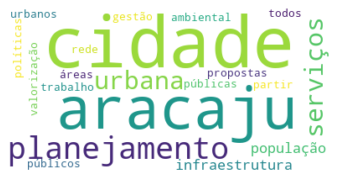

In [222]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

words_cloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(sentences_dictionary)

plt.imshow(words_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()